In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
import numpy as np

In [3]:
df0 = pd.read_csv('TCUSTINFO.csv',encoding = "gbk") #中文时采用

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,7,8,9,36,43,44,49,55,61,62,65,66,69,79,98,99,113,123,124,125,126,127,128,129,130,131,132,133,139,140,141,142,143,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df0.shape

(153772, 158)

In [9]:
df0.columns

Index(['VC_CUSTNO', 'C_CUSTTYPE', 'VC_CUSTOMNAME', 'VC_SHORTNAME',
       'C_IDENTITYTYPE', 'VC_IDENTITYNO', 'C_MODIFYFLAG', 'VC_INSTREPRNAME',
       'C_INSTREPRTYPE', 'VC_INSTREPRNO',
       ...
       'VC_CAPITALPROPERTY', 'VC_EQUITYCONTROLCOMPOSITION',
       'C_CUSTINFOCOMPLETE', 'C_CUSTFUNDTIMELIMITFLAG', 'C_SCHGFLAG',
       'VC_SCEFFECTDATE', 'VC_SCEFFECTENDDATE', 'VC_PRODUCTID',
       'C_NONPERCUSTTYPE', 'VC_VOCATIONDETAIL'],
      dtype='object', length=158)

In [11]:
df1 = df0[df0.C_CUSTTYPE == 1]

In [18]:
df1.shape

(152557, 158)

In [21]:
df2 = df1.dropna(axis=1,how='all') #去掉全部为空的列

In [22]:
df2.shape

(152557, 60)

In [23]:
df2.columns

Index(['VC_CUSTNO', 'C_CUSTTYPE', 'VC_CUSTOMNAME', 'C_IDENTITYTYPE',
       'VC_IDENTITYNO', 'C_MODIFYFLAG', 'C_VOCATION', 'L_INCOME', 'C_SEX',
       'VC_BIRTHDAY', 'C_INVEST', 'C_STATE', 'VC_SPELL', 'C_WORKTIME',
       'C_INVESTEXP', 'VC_QUESTIONARYDATE', 'VC_NATIONALITY', 'VC_IDVALIDATE',
       'VC_HOLDINGNAME', 'VC_AMLEXPLAIN', 'VC_REGADDRESS', 'C_SELFCLEARPASSWD',
       'EN_REGISTCAPITAL', 'VC_OPENDATE', 'VC_LASTDATE', 'VC_FULLCUSTOMNAME',
       'C_NETSHOWDESTROYACCO', 'VC_IDENTITYNOEIGHTEEN', 'C_INCOMESOURCE',
       'C_NORTHAMERICAN', 'C_ACUTALBUSINRANGE', 'VC_ACCOUNTHOLDER',
       'VC_CUSTCONSIGNEE', 'EN_CUSTFUNDTIMELIMIT', 'C_PUBPROFESSIONVALIDDATE',
       'C_PUBPROFESSIONSUBTYPE', 'C_PUBPROFESSIONFLAG', 'C_PUBHGFLAG',
       'VC_BADINTEGRITY', 'VC_ORGANIZATIONNOBEGINDATE', 'VC_TAXBEGINDATE',
       'VC_HOLDINGIDVALIBEGINDATE', 'VC_INSTREPRNOBEGINDATE',
       'VC_INSTREPRPHONE', 'VC_CERTIFICATEUNIT', 'VC_BUSINMODE',
       'C_LISTEDCOMPANYMODE', 'C_STATEOWNEDENTERPRISE'

In [49]:
df2.C_STATE.value_counts()

0    152477
6        80
Name: C_STATE, dtype: int64

In [95]:
df2.C_INVEST.nunique(dropna=True)

1

In [40]:
df3 = df2.drop(['VC_CUSTOMNAME','C_IDENTITYTYPE','L_INCOME','VC_BIRTHDAY'],axis=1) #去掉某些列

In [41]:
df3.head()

,VC_CUSTNO,C_CUSTTYPE,VC_IDENTITYNO,C_MODIFYFLAG,C_VOCATION,C_SEX,C_INVEST,C_STATE,VC_SPELL,C_WORKTIME,...,C_BENEFICIARYIDTYPE,VC_BENEFICIARYIDNO,VC_BENEFICIARYIDVALIDATE,C_HOLDIDENTITYTYPE,VC_HOLDIDENTITYNO,VC_HOLDIDVALIDATE,C_BENEFICIARYCUSTTYPE,C_HOLDIDENTITYCUSTTYPE,C_CUSTINFOCOMPLETE,C_CUSTFUNDTIMELIMITFLAG
0,7068,1,320921198303042032,0,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7078,1,142730196805050010,1,3.0,1.0,NaN,0,ghw,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,
2,7088,1,510184198207162680,1,3.0,0.0,NaN,0,tx,NaN,...,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,NaN
3,13538,1,610302198808050537,1,3.0,1.0,NaN,0,wmc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,13548,1,320882198003201617,1,1.0,1.0,NaN,0,cd,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 性别比

Text(0.5, 1.0, '用户性别比')

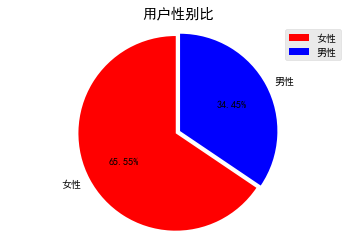

In [138]:
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

label_list = ["女性", "男性"]    #  0 女性 1 男性
size = df3.groupby(['C_SEX']).size()    # 各部分大小
color = ["red", "blue"]     # 各部分颜色
explode = [0,0.05]   # 各部分突出值

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, \
                                  autopct="%1.2f%%", shadow=False, startangle=90, pctdistance=0.6)
#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
# for t in l_text:
#     t.set_size(20)
for t in p_text:
    t.set_size(10)

plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
plt.legend()
plt.title('用户性别比')

#### 职业是否填写比例

Text(0.5, 1.0, '职业填写比例')

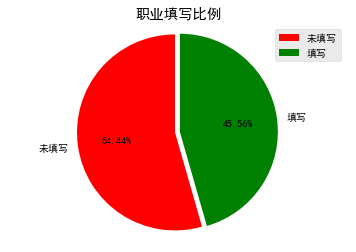

In [137]:
label_list=['未填写','填写']
size = (df3.C_VOCATION.isna() == True).value_counts()
color = ["red", "green"]     # 各部分颜色
explode = [0,0.05]   # 各部分突出值
patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, \
                                  autopct="%1.2f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
plt.legend()
plt.title('职业填写比例')

#### 职业分布图

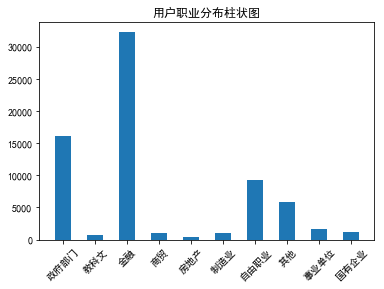

In [32]:
# 1：政府部门 2：教科文 3：金融 4：商贸 5：房地产 6：制造业 7：自由职业 8：其他 9：事业单位 10：国有企业
fig, ax = plt.subplots()
num_cols = ['政府部门','教科文','金融','商贸','房地产','制造业','自由职业','其他','事业单位','国有企业']
positions = range(0,10)
heights = df3.groupby(['C_VOCATION']).size()
ax.bar(positions,heights,0.5)
ax.set_xticks(positions)
ax.set_xticklabels(num_cols,rotation=45)
plt.title('用户职业分布柱状图')
plt.show()

#### 年龄

In [82]:
df3['C_AGE'] = df3.VC_IDENTITYNO.apply(lambda x:datetime.datetime.now().year-int(x[6:10]))

In [96]:
df0.loc[df0['VC_CUSTNO']==1485388] #查看某一行的

,VC_CUSTNO,C_CUSTTYPE,VC_CUSTOMNAME,VC_SHORTNAME,C_IDENTITYTYPE,VC_IDENTITYNO,C_MODIFYFLAG,VC_INSTREPRNAME,C_INSTREPRTYPE,VC_INSTREPRNO,...,VC_CAPITALPROPERTY,VC_EQUITYCONTROLCOMPOSITION,C_CUSTINFOCOMPLETE,C_CUSTFUNDTIMELIMITFLAG,C_SCHGFLAG,VC_SCEFFECTDATE,VC_SCEFFECTENDDATE,VC_PRODUCTID,C_NONPERCUSTTYPE,VC_VOCATIONDETAIL
148404,1485388,1,LIAO SHING YU,NaN,6,488854276,1,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df4 = df3.drop(148404,axis=0,inplace=False) #通过df3['C_AGE'].describe()查看发现异常值，去除异常值的行

In [111]:
df4.sort_values(by='C_AGE',ascending=False).head() #排序

,VC_CUSTNO,C_CUSTTYPE,VC_IDENTITYNO,C_MODIFYFLAG,C_VOCATION,C_SEX,C_INVEST,C_STATE,VC_SPELL,C_WORKTIME,...,VC_BENEFICIARYIDNO,VC_BENEFICIARYIDVALIDATE,C_HOLDIDENTITYTYPE,VC_HOLDIDENTITYNO,VC_HOLDIDVALIDATE,C_BENEFICIARYCUSTTYPE,C_HOLDIDENTITYCUSTTYPE,C_CUSTINFOCOMPLETE,C_CUSTFUNDTIMELIMITFLAG,C_AGE
56988,628358,1,110104192312041617,1,8.0,1.0,NaN,0,mjk,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,96
92866,1044578,1,440232192703274116,0,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
51743,574398,1,330321192711280314,0,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
37494,447728,1,110101192804065018,1,8.0,1.0,NaN,0,ngc,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,91
68477,787388,1,442525192803015714,1,1.0,1.0,NaN,0,zrq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91


In [ ]:
df4.C_AGE.value_counts()

#### 年龄一元直方图

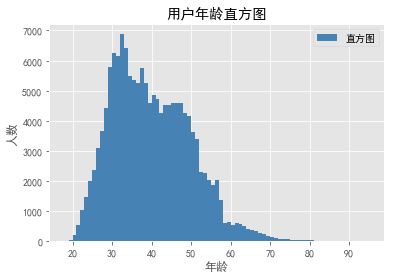

In [129]:
# hist函数的参数解读

# 绘图之前，我们先来讲解一下matplotlib包中hist函数的参数含义及使用方法：

# plt.hist(x, bins= 10, range= None, normed= False, weights= None, cumulative= False, bottom= None, histtype= 'bar', align= 'mid', orientation= 'vertical', rwidth= None, log= False, color= None, label= None, stacked= False)

# x：指定要绘制直方图的数据；

# bins：指定直方图条形的个数；

# range：指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；

# normed：是否将直方图的频数转换成频率；

# weights：该参数可为每一个数据点设置权重；

# cumulative：是否需要计算累计频数或频率；

# bottom：可以为直方图的每个条形添加基准线，默认为0；

# histtype：指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’, ‘stepfilled’；

# align：设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；

# orientation：设置直方图的摆放方向，默认为垂直方向；

# rwidth：设置直方图条形宽度的百分比；

# log：是否需要对绘图数据进行log变换；

# color：设置直方图的填充色；

# label：设置直方图的标签，可通过legend展示其图例；

# stacked：当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放；

# plt.hist(df4.C_AGE,bins=np.arange(df4.C_AGE.min,df4.C_AGE.max,3),color='steelblue',label='直方图')
plt.hist(df4.C_AGE,bins=np.arange(df4.C_AGE.min(),df4.C_AGE.max(),1),color='steelblue',label='直方图')
# 设置图形的显示风格
plt.style.use( 'ggplot')
plt.title('用户年龄直方图')
plt.xlabel('年龄')
plt.ylabel('人数')
# 显示图例
plt.legend()
# 显示图形
plt.show()

#### 年龄二元直方图

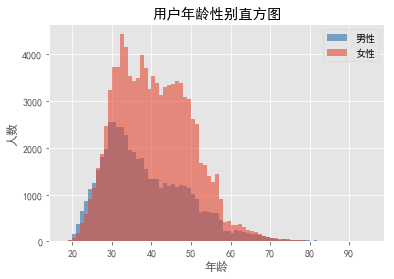

In [136]:
age_female = df4.C_AGE[df4.C_SEX == 0.0]
age_male = df4.C_AGE[df4.C_SEX == 1.0]

# 男性乘客年龄直方图
plt.hist(age_male, bins = np.arange(df4.C_AGE.min(),df4.C_AGE.max(),1), label = '男性', color = 'steelblue', alpha = 0.7)
# 女性乘客年龄直方图
plt.hist(age_female, bins = np.arange(df4.C_AGE.min(),df4.C_AGE.max(),1), label = '女性', alpha = 0.6)

# 设置图形的显示风格
plt.style.use( 'ggplot')
plt.title('用户年龄性别直方图')
plt.xlabel('年龄')
plt.ylabel('人数')
# 显示图例
plt.legend()
# 显示图形
plt.show()

In [134]:
age_female

2         37
5         39
6         48
7         34
8         32
10        33
11        36
13        45
17        29
18        34
19        33
21        33
22        36
24        27
26        41
27        43
28        45
29        30
30        56
31        44
32        38
33        35
40        31
43        34
44        39
45        42
46        34
48        39
49        43
52        41
          ..
153733    40
153734    42
153736    69
153737    39
153740    28
153741    32
153742    33
153743    41
153744    43
153745    28
153746    45
153747    49
153748    29
153750    45
153751    42
153752    47
153753    38
153754    44
153755    52
153756    55
153757    34
153758    47
153760    38
153761    32
153762    27
153766    44
153767    41
153768    39
153769    45
153770    27
Name: C_AGE, Length: 99996, dtype: int64